<a href="https://colab.research.google.com/github/ayucahyarani/Data-Mining/blob/main/Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mengimplementasikan Konsep Segmentasi Pelanggan untuk menilai pelanggan mal berdasarkan perilaku dan data pembelian mereka.**

#**Import Library**

##**Core Library**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from google.colab import files

##**Library untuk Splitting Data**

In [2]:
from sklearn.model_selection import train_test_split

##**Library untuk Normalisasi Data**

In [3]:
from sklearn.preprocessing import MinMaxScaler

##**Library Untuk Build Model**

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Segmentasi pelanggan di mal bertujuan untuk memahami cara pelanggan berbelanja di mal. Tujuan utamanya adalah untuk memahami pelanggan lebih baik, meningkatkan pengalaman berbelanja, dan meningkatkan keuntungan.

##**Assess Situation**

Di mal, pelanggan memiliki kebiasaan berbelanja yang beragam. Dengan data tentang pelanggan seperti usia, jenis kelamin, dan pola pembelian, kita bisa mengetahui lebih banyak tentang preferensi mereka dan bagaimana kita bisa melayani mereka lebih baik.

##**Data Mining Goals**

- Mengelompokkan pelanggan berdasarkan pola pembelian dan perilaku mereka.
- Mengidentifikasi kelompok pelanggan yang paling berharga untuk mal.
- Mempelajari faktor-faktor yang memengaruhi tingkat pengeluaran pelanggan.

##**Project Plan**

- Mengumpulkan data tentang pelanggan seperti usia, jenis kelamin, dan pola pembelian.
- Menganalisis data untuk melihat pola dan tren dalam perilaku belanja pelanggan.
- Mengelompokkan pelanggan berdasarkan perilaku belanja mereka.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Dataset "Customer Segmentation" berasal dari Kaggle yang memberikan informasi tentang pelanggan di suatu mal. Dataset ini dikumpulkan oleh pengguna Kaggle dari mal tertentu untuk analisis segmentasi pelanggan.

Link dataset: https://www.kaggle.com/datasets/joebeachcapital/customer-segmentation

In [5]:
cs = pd.read_csv('https://raw.githubusercontent.com/ayucahyarani/Data-Mining/main/Mall_Customers.csv')
cs.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##**Describe Data**

###**Informasi Dasar**

In [6]:
jumlah_baris, jumlah_kolom = cs.shape
print("Jumlah baris:", jumlah_baris)
print("Jumlah kolom:", jumlah_kolom)

Jumlah baris: 200
Jumlah kolom: 5


Dataset ini memiliki 200 baris dan 5 kolom. Artinya, terdapat 200 data pelanggan dalam dataset tersebut, yang dibagi ke dalam 5 kolom yang berbeda yang masing-masing menyimpan informasi seperti CustomerID, Gender, Age, Annual Income (k$), dan Spending Score (1-100).

###**Informasi Lanjutan**

In [7]:
print(cs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Dataset ini memiliki 5 kolom dengan informasi sebagai berikut:

1. **CustomerID**: Kolom ini menyimpan ID unik untuk setiap pelanggan. Jumlahnya adalah 200. Tipe data dari kolom ini adalah integer (`int64`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

2. **Gender**: Kolom ini menyimpan informasi tentang jenis kelamin pelanggan. Jumlahnya adalah 200. Tipe data dari kolom ini adalah objek (`object`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

3. **Age**: Kolom ini menyimpan informasi tentang usia pelanggan. Jumlahnya adalah 200. Tipe data dari kolom ini adalah integer (`int64`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

4. **Annual Income (k$)**: Kolom ini menyimpan informasi tentang pendapatan tahunan pelanggan dalam ribu dolar. Jumlahnya adalah 200. Tipe data dari kolom ini adalah integer (`int64`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

5. **Spending Score (1-100)**: Kolom ini menyimpan informasi tentang skor pengeluaran pelanggan dalam skala 1-100. Jumlahnya adalah 200. Tipe data dari kolom ini adalah integer (`int64`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

###**Informasi Statistik Deskriptif**

In [8]:
print(cs.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


Berikut adalah penjelasan statistik deskriptif untuk setiap kolom numerik dalam dataset:

**1. CustomerID:**

* **Mean:** Rata-rata ID pelanggan (100.500)
* **Std:** Standar deviasi ID pelanggan (57.879)
* **Min:** ID pelanggan terkecil (1)
* **25%:** 25% ID pelanggan terendah (50.750)
* **50%:** Median ID pelanggan (100.500)
* **75%:** 75% ID pelanggan terendah (150.250)
* **Max:** ID pelanggan terbesar (200.000)

**2. Age:**

* **Mean:** Rata-rata usia pelanggan (38.85 tahun)
* **Std:** Standar deviasi usia pelanggan (13.969 tahun)
* **Min:** Usia pelanggan termuda (18 tahun)
* **25%:** 25% pelanggan termuda (28.75 tahun)
* **50%:** Usia median pelanggan (36 tahun)
* **75%:** 75% pelanggan termuda (49 tahun)
* **Max:** Usia pelanggan tertua (70 tahun)

**3. Annual Income (k$)**:

* **Mean:** Rata-rata pendapatan tahunan pelanggan (60.560 dolar)
* **Std:** Standar deviasi pendapatan tahunan pelanggan (26.265 dolar)
* **Min:** Pendapatan tahunan terendah (15.000 dolar)
* **25%:** 25% pelanggan dengan pendapatan terendah (41.500 dolar)
* **50%:** Median pendapatan tahunan pelanggan (61.500 USD)
* **75%:** 75% pelanggan dengan pendapatan terendah (78.000 dolar)
* **Max:** Pendapatan tahunan tertinggi (137.000 dolar)

**4. Spending Score (1-100)**:

* **Mean:** Rata-rata skor pengeluaran pelanggan (50.20)
* **Std:** Standar deviasi skor pengeluaran pelanggan (25.824)
* **Min:** Skor pengeluaran terendah (1)
* **25%:** 25% pelanggan dengan skor pengeluaran terendah (34.75)
* **50%:** Median skor pengeluaran pelanggan (50)
* **75%:** 75% pelanggan dengan skor pengeluaran terendah (73)
* **Max:** Skor pengeluaran tertinggi (99)

##**Exploratory Data Analysis**

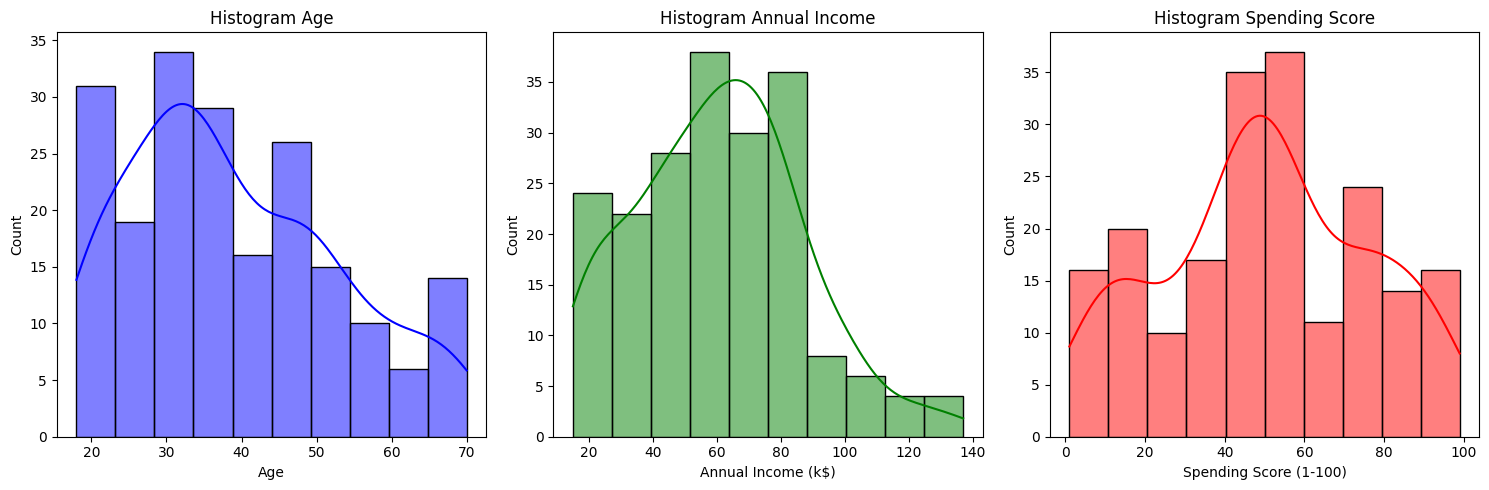

In [9]:
#Distribution Plots

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(cs['Age'], bins=10, kde=True, color='blue')
plt.title('Histogram Age')

plt.subplot(1, 3, 2)
sns.histplot(cs['Annual Income (k$)'], bins=10, kde=True, color='green')
plt.title('Histogram Annual Income')

plt.subplot(1, 3, 3)
sns.histplot(cs['Spending Score (1-100)'], bins=10, kde=True, color='red')
plt.title('Histogram Spending Score')

plt.tight_layout()
plt.show()

Berdasarkan gambar, terdapat tiga Distribution Plots yang menunjukkan:

- **Age**: Distribusi usia berbentuk miring kanan dengan mayoritas orang berada di usia 20-an dan 30-an. Jumlah orang berkurang seiring dengan bertambahnya usia.
- **Annual Income (k$)**: Distribusi pendapatan tahunan rata-rata berbentuk miring kanan dengan mayoritas orang memiliki pendapatan di kisaran 50.000 - 100.000 dolar per tahun. Ada beberapa orang dengan pendapatan yang sangat tinggi (di atas 140.000 dolar per tahun).
- **Spending Score (1-100)**: Distribusi skor pengeluaran terdistribusi secara normal dengan mayoritas orang memiliki skor di kisaran 40-60.

<ipython-input-10-b54b5cf43600>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cs.corr().round(2), annot=True, cmap='Blues')


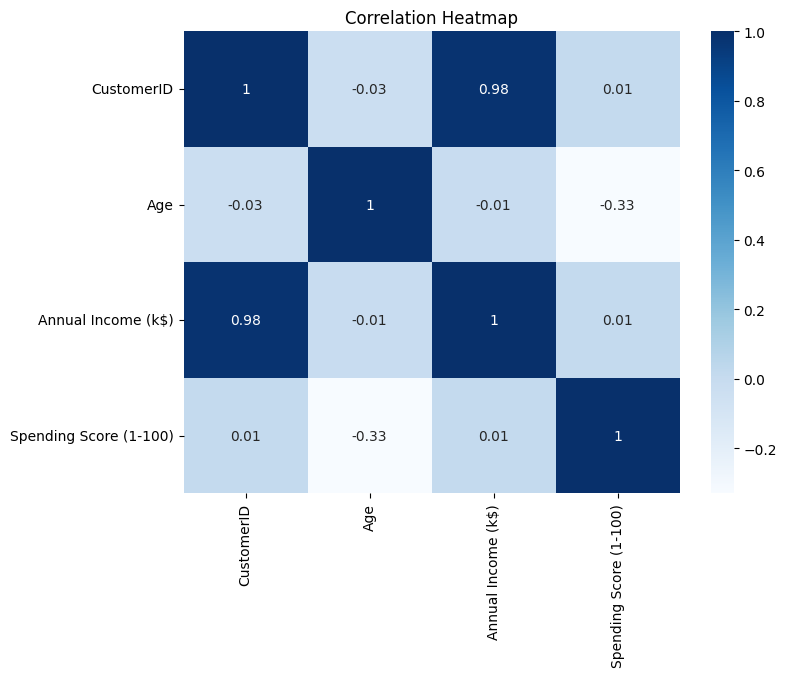

In [10]:
#Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(cs.corr().round(2), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')

plt.show()

Berdasarkan gambar, terdapat Heatmap yang menunjukkan:

- **CustomerID**: Tidak memiliki korelasi yang kuat dengan variabel lain.
- **Age**: Memiliki korelasi negatif yang lemah dengan Spending Score (1-100). Artinya, semakin tua seseorang, semakin kecil kemungkinan mereka untuk menghabiskan banyak uang.
- **Annual Income (k$)**: Memiliki korelasi positif yang kuat dengan Spending Score (1-100). Artinya, semakin tinggi pendapatan seseorang, semakin besar kemungkinan mereka untuk menghabiskan banyak uang.

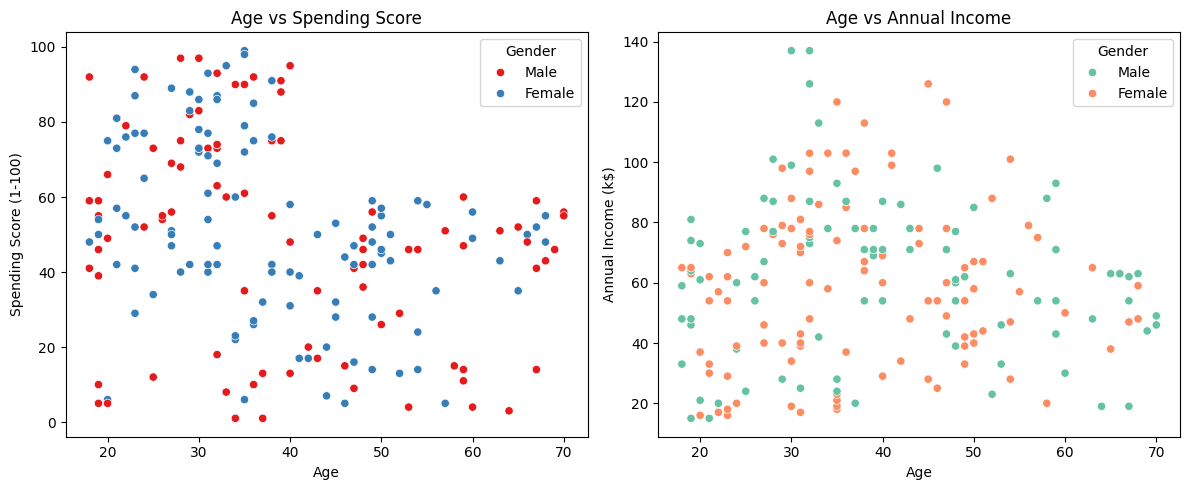

In [11]:
#Scatterplot

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=cs, x='Age', y='Spending Score (1-100)', hue='Gender', palette='Set1')
plt.title('Age vs Spending Score')

plt.subplot(1, 2, 2)
sns.scatterplot(data=cs, x='Age', y='Annual Income (k$)', hue='Gender', palette='Set2')
plt.title('Age vs Annual Income')

plt.tight_layout()
plt.show()

Berdasarkan gambar, terdapat dua Scatterplot yang menunjukkan:

- **Age vs Spending Score**: Terdapat korelasi negatif yang lemah antara usia dan skor pengeluaran. Artinya, seiring bertambahnya usia, skor pengeluaran cenderung meningkat. Pola penyebaran data menunjukkan banyak variasi dalam skor pengeluaran untuk setiap kelompok usia.
- **Age vs Annual Income**: Terdapat korelasi positif yang kuat antara usia dan pendapatan tahunan rata-rata. Artinya, seiring bertambahnya usia, penghasilan tahunan cenderung meningkat secara signifikan. Pola penyebaran data menunjukkan variasi yang lebih kecil dalam penghasilan tahunan dibandingkan skor pengeluaran.

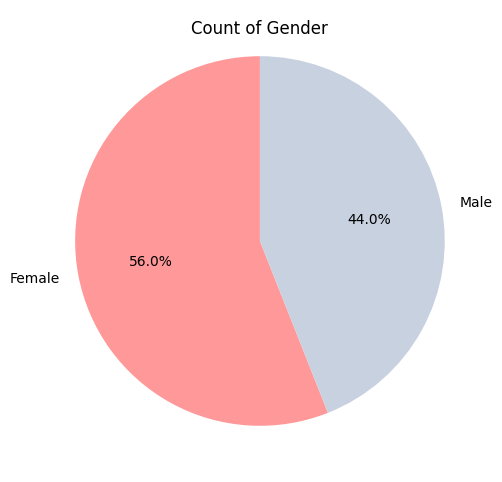

In [12]:
#Pie Chart

gender_counts = cs['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#c7d1e0'])
plt.title('Count of Gender', y=0.93)
plt.show()

Berdasarkan gambar, terdapat Pie Chart yang menunjukkan jumlah pelanggan terbanyak berdasarkan gender adalah perempuan, yaitu sebanyak 56%.

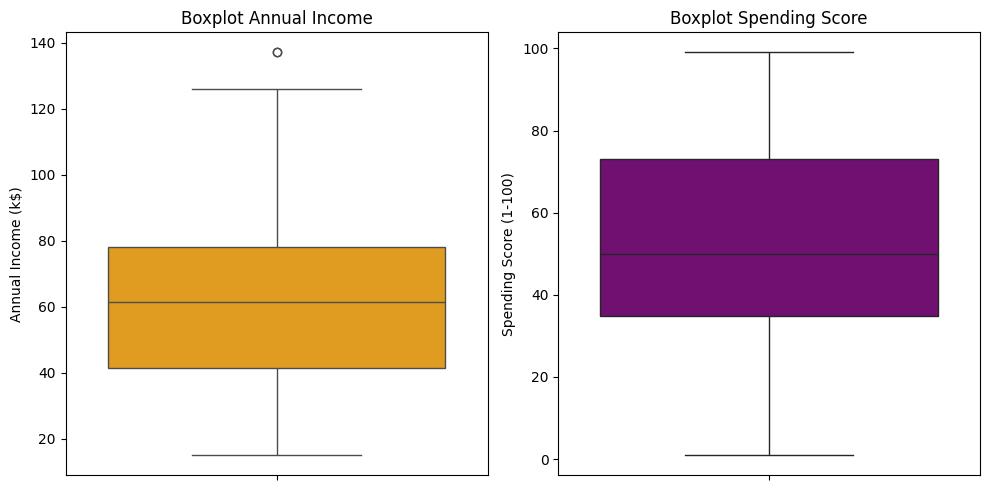

In [13]:
#Boxplot

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='Annual Income (k$)', data=cs, color='orange')
plt.title('Boxplot Annual Income')

plt.subplot(1, 2, 2)
sns.boxplot(y='Spending Score (1-100)', data=cs, color='purple')
plt.title('Boxplot Spending Score')

plt.tight_layout()
plt.show()

Berdasarkan gambar, terdapat dua Boxplot yang menunjukkan:

- **Annual Income**: Median pendapatan tahunan adalah sekitar 80.000 dolar dan sebagian besar pendapatan tahunan berada antara 60.000 dan 100.000 dolar.
- **Spending Score**: Median skor pengeluaran adalah sekitar 60 dan sebagian besar skor pengeluaran berada antara 40 dan 80.

Secara umum, pelanggan dalam mal ini memiliki pendapatan tahunan yang lebih tinggi daripada skor pengeluaran mereka.

##**Verify Data Quality**

###**Missing Values**

In [14]:
nama_kolom = cs.columns[cs.isnull().any()]
if nama_kolom.empty:
    print("Tidak ada nilai kosong pada dataset.")
else:
    print("Kolom dengan nilai kosong:", nama_kolom)

Tidak ada nilai kosong pada dataset.


Dalam dataset ini setiap kolom dan baris memiliki nilai yang terisi lengkap. Tidak ada bagian dari dataset yang kosong atau tidak memiliki nilai.

###**Outliers Values**

In [15]:
results = []

cols = cs.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = cs[col].quantile(0.25)
  q3 = cs[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = cs[(cs[col] < lower_bound) | (cs[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(cs))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_cs = pd.DataFrame(results)
results_cs.set_index('Kolom', inplace=True)
results_cs = results_cs.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_cs)

Kolom,Persentase Outliers
CustomerID,0.0
Age,0.0
Annual Income (k$),1.0
Spending Score (1-100),0.0


Berdasarkan kolom dan persentasi outliers pada dataset ini, terlihat bahwa hanya kolom "Annual Income (k$)" yang memiliki outliers, dengan persentase sebesar 1.0. Artinya, terdapat sebagian kecil dari data pada kolom Annual Income yang berada di luar jangkauan nilai yang dianggap normal berdasarkan kuartil data. Sementara itu, kolom lainnya tidak memiliki outliers berdasarkan batasan yang ditentukan.

###**Duplicated Values**

In [16]:
result_data = []

for col in cs.columns:
    is_duplicated = 'Ya' if cs[col].duplicated().any() else 'Tidak'
    result_data.append({'Kolom': col, 'Duplikat': is_duplicated})

result_cs = pd.DataFrame(result_data)
print(result_cs)

                    Kolom Duplikat
0              CustomerID    Tidak
1                  Gender       Ya
2                     Age       Ya
3      Annual Income (k$)       Ya
4  Spending Score (1-100)       Ya


Berdasarkan kolom pada dataset ini, terlihat bahwa ada nilai duplikat pada kolom "Gender", "Age", "Annual Income (k$)", dan "Spending Score (1-100)". Yang berarti ada nilai yang sama muncul lebih dari sekali dalam setiap kolom yang disebutkan di atas. Sedangkan untuk kolom "CustomerID", tidak ada nilai yang sama yang muncul lebih dari sekali, yang berarti setiap ID pelanggan unik.

###**Inconsistent Values / Noise (Optional)**

In [17]:
for column in cs.columns:
    print(f"Column: {column}")
    unique_values_count = len(cs[column].unique())
    print(f"Jumlah Nilai Unik: {unique_values_count}")
    print()

Column: CustomerID
Jumlah Nilai Unik: 200

Column: Gender
Jumlah Nilai Unik: 2

Column: Age
Jumlah Nilai Unik: 51

Column: Annual Income (k$)
Jumlah Nilai Unik: 64

Column: Spending Score (1-100)
Jumlah Nilai Unik: 84



Berdasarkan analisis nilai inkonsisten / noise pada dataset ini menunjukkan:
- Kolom **CustomerID** memiliki nilai unik sebanyak 200, menunjukkan bahwa tidak ada duplikasi data.
- Kolom **Gender** memiliki nilai unik sebanyak 2, menunjukkan hanya ada dua jenis kelamin yang terdaftar (male dan female).
- Kolom **Age** memiliki nilai unik sebanyak 51, menunjukkan rentang usia yang cukup luas (dari 18 hingga 70 tahun) dengan 51 kemungkinan usia.
- Kolom **Annual Income (k$)** memiliki 64 nilai unik, menunjukkan kemungkinan adanya nilai inkonsisten / noise. Rentang pendapatan yang luas (dari 15.000 hingga 137.000 dolar) dengan 64 kemungkinan nilai, menandakan kemungkinan adanya data yang tidak konsisten.
- Kolom **Spending Score (1-100)** memiliki 84 nilai unik, menunjukkan kemungkinan adanya nilai inkonsisten / noise. Rentang skor yang luas (dari 1 hingga 99) dengan 84 kemungkinan nilai, menandakan kemungkinan adanya data yang tidak konsisten.

#**DATA PREPARATION**

##**Data Cleaning**

###**Pengecekkan Missing Values**

In [18]:
print((cs.isna().sum() / len(cs)) * 100)

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64


Dalam dataset ini setiap kolom dan baris memiliki nilai yang terisi lengkap. Tidak ada bagian dari dataset yang kosong atau tidak memiliki nilai.

###**Pengecekkan Duplicated Values**

In [19]:
cs[cs.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


Dalam dataset ini setiap baris data memiliki kombinasi nilai yang unik untuk setiap kolomnya, jadi tidak ada baris data yang dianggap duplikat.

##**Pengecekkan Outliers**

In [20]:
results = []

cols = cs.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = cs[col].quantile(0.25)
  q3 = cs[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = cs[(cs[col] < lower_bound) | (cs[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(cs))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_cs = pd.DataFrame(results)
results_cs.set_index('Kolom', inplace=True)
results_cs = results_cs.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_cs)

Kolom,Persentase Outliers
CustomerID,0.0
Age,0.0
Annual Income (k$),1.0
Spending Score (1-100),0.0


Berdasarkan kolom dan persentasi outliers pada dataset ini, terlihat bahwa hanya kolom "Annual Income (k$)" yang memiliki outliers, dengan persentase sebesar 1.0. Artinya, terdapat sebagian kecil dari data pada kolom Annual Income yang berada di luar jangkauan nilai yang dianggap normal berdasarkan kuartil data. Sementara itu, kolom lainnya tidak memiliki outliers berdasarkan batasan yang ditentukan.

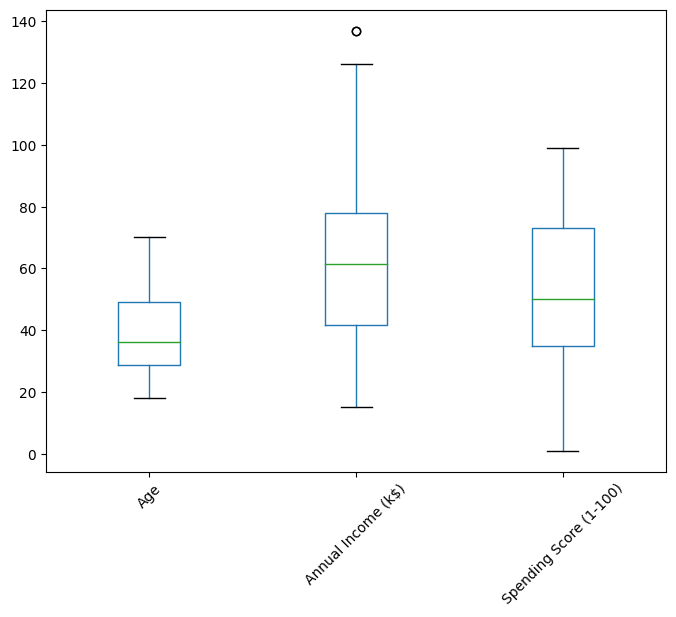

In [21]:
boxplot = cs.drop('CustomerID', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Berdasarkan gambar, terdapat boxplot yang menunjukkan:

Kolom "Annual Income (k$)" memiliki beberapa orang yang pendapatan tahunannya jauh lebih tinggi dibandingkan dengan orang lain pada umumnya. Outliers ini terletak di luar batas interkuartil (IQR), yang diwakili oleh garis kotak pada grafik.

####**Hapus Outliers**

Melakukan penghapusan baris pada kolom "Annual Income (k$)" untuk menanganani outliers

In [22]:
Q1 = cs['Annual Income (k$)'].quantile(0.25)
Q3 = cs['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cs = cs[(cs['Annual Income (k$)'] >= lower_bound) & (cs['Annual Income (k$)'] <= upper_bound)]

####**Pengecekkan Ulang**

In [23]:
results = []

cols = cs.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = cs[col].quantile(0.25)
  q3 = cs[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = cs[(cs[col] < lower_bound) | (cs[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(cs))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_cs = pd.DataFrame(results)
results_cs.set_index('Kolom', inplace=True)
results_cs = results_cs.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_cs)

Kolom,Persentase Outliers
CustomerID,0.0
Age,0.0
Annual Income (k$),0.0
Spending Score (1-100),0.0


Berdasarkan kolom dan persentasi outliers setelah dilakukan penghapusan outliers, dapat dilihat bahwa kolom "Annual Income (k$)" sudah tidak memiliki outliers. Artinya data ini dapat memberikan gambaran yang lebih akurat tentang pendapatan tahunan rata-rata di setiap kelompok usia.

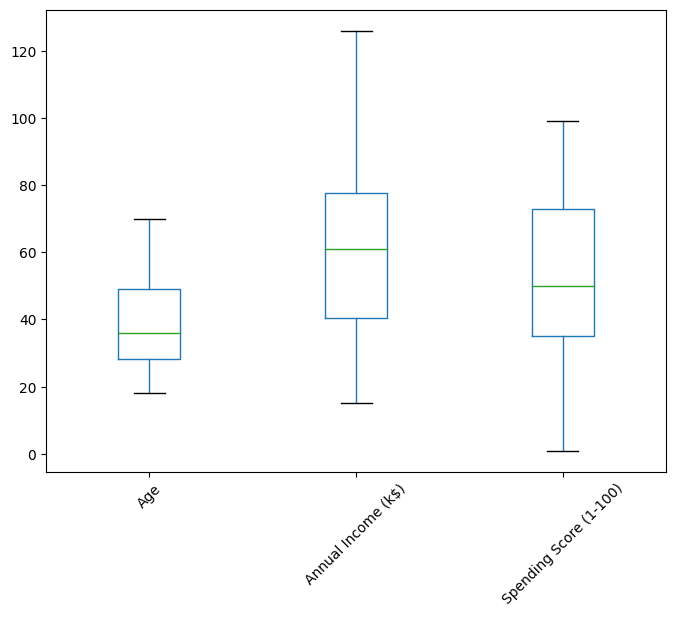

In [24]:
boxplot = cs.drop('CustomerID', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Berdasarkan gambar, terdapat boxplot yang menunjukkan penghapusan outlier menyebabkan perubahan pada distribusi pendapatan tahunan:

- **Kelompok usia 20-30 tahun**: Batas kotak atas dan bawah turun, menunjukkan pendapatan tahunan yang lebih terkonsentrasi.
- **Kelompok usia 40-50 tahun**: Batas kotak atas turun, menunjukkan pendapatan tahunan maksimum yang lebih rendah.
- **Kelompok usia 60-70 tahun**: Median income turun, menunjukkan pendapatan tahunan rata-rata yang lebih rendah.

##**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

 Menambahkan kolom "Income Category" yang bertujuan agar data lebih terstruktur dan mudah dipahami. Dengan kolom ini, pengguna bisa menganalisis data dengan lebih baik untuk melihat pola atau tren dalam pendapatan tahunan. Kategori ini juga membantu dalam segmentasi pelanggan berdasarkan pendapatannya, yang bisa membantu dalam membuat strategi pemasaran atau keputusan bisnis.

In [25]:
def categorize_income(income):
    if 15 <= income <= 30:
        return 'Low'
    elif 31 <= income <= 60:
        return 'Medium'
    elif 61 <= income <= 100:
        return 'High'
    elif 101 <= income <= 137:
        return 'Very High'
    else:
        return 'Unknown'

cs['Income Category'] = cs['Annual Income (k$)'].apply(categorize_income)

###**Pengecekkan Hasil**

In [26]:
cs.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Category
0,1,Male,19,15,39,Low
1,2,Male,21,15,81,Low
2,3,Female,20,16,6,Low
3,4,Female,23,16,77,Low
4,5,Female,31,17,40,Low


Berdasarkan dataset tersebut, dapat dilihat bahwa kolom "Income Category" sudah berhasil ditambahkan dalam dataset ini.

##**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [27]:
cs_corr = cs.corr(numeric_only=True)
px.imshow(cs_corr)

Berdasarkan gambar, terdapat Heatmap yang menunjukkan:

Kolom "CustomerID" tidak memiliki hubungan yang kuat dengan kolom lain. Hal ini terlihat dari warna kuning pada heatmap pada baris dan kolom CustomerID. Oleh karena itu, kolom CustomerID akan dihapus untuk meningkatkan efisiensi analisis.

In [28]:
cs = cs.drop(['CustomerID'], axis=1)

Dalam dataset ini kolom "CustomerID" hanya berperan sebagai identifikasi unik untuk setiap entitas dalam dataset dan tidak memiliki hubungan yang kuat dengan kolom lain. Dengan demikian, menghapus kolom ini dapat mengurangi kompleksitas dataset, menghemat ruang penyimpanan, dan mempercepat proses analisis karena ukuran dataset menjadi lebih kecil.

###**Pengecekkan Hasil**

In [29]:
cs.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Category
0,Male,19,15,39,Low
1,Male,21,15,81,Low
2,Female,20,16,6,Low
3,Female,23,16,77,Low
4,Female,31,17,40,Low


Berdasarkan dataset tersebut, dapat dilihat bahwa kolom "CustomerID" sudah berhasil dihapus dari dataset ini.

##**Data Transformation**

###**Mapping**

Mapping dilakukan pada kolom:
- **Gender**: mengubah nilai kolom menjadi numerik, dengan 'Male' menjadi 1 dan 'Female' menjadi 0.
- **Income Category**: mengubah nilai kolom menjadi numerik, dengan 'Low' menjadi 0, 'Medium' menjadi 1, 'High' menjadi 2, dan 'Very High' menjadi 3

In [30]:
cs['Gender'] = cs['Gender'].map({'Male':1,'Female':0})
cs['Income Category'] = cs['Income Category'].map({'Low': 0, 'Medium': 1,'High': 2, 'Very High': 3}).astype(int)

In [31]:
cs

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Category
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0
...,...,...,...,...,...
193,0,38,113,91,3
194,0,47,120,16,3
195,0,35,120,79,3
196,0,45,126,28,3


###**Encoding**

Mengonversi variabel kategori menjadi bentuk biner (dummy variables) dalam bentuk matriks 0 dan 1. Hal ini memungkinkan algoritma machine learning untuk memahami dan memproses variabel kategori, sehingga meningkatkan kemampuan model untuk melakukan prediksi dan analisis data.

In [32]:
cs = pd.get_dummies(cs)

###**Pengecekkan Hasil**

In [33]:
cs.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Category
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0


Berdasarkan dataset tersebut, dapat dilihat bahwa setelah melakukan encoding tidak ada perubahan pada data, karena encoding secara otomatis mengenali kolom-kolom yang sudah dalam bentuk numerik dan tidak memerlukan encoding tambahan.

##**Konversi DataFrame**

Menyimpan data set yang telah dibersihkan ke file CSV baru.

#**MODELLING TECHNIQUES**

Model asosiatif digunakan untuk mengelompokkan pelanggan berdasarkan pola pembelian dan perilaku mereka. Dengan data usia, jenis kelamin, dan pola pembelian, model ini mengidentifikasi tren belanja dan memungkinkan perusahaan menerapkan strategi pemasaran yang lebih efektif untuk memenuhi kebutuhan pelanggan secara spesifik.

##**Pre-Processing**

###**Adjusment**

In [50]:
x_final = cs.drop("Income Category", axis=1)

Dalam konteks segmentasi pelanggan, kolom "Income Category" dihapus dari dataframe karena mungkin tidak relevan untuk analisis perilaku belanja pelanggan. Kolom lain seperti "Gender", "Age", "Annual Income (k$)", dan "Spending Score (1-100)" lebih penting untuk menilai pola pembelian dan perilaku pelanggan. Jadi, dapat dilakukan penyesuaian untuk fokus pada aspek yang lebih relevan dalam analisis segmentasi pelanggan.

###**Normalisasi Data**

In [51]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

Normalisasi data berfungsi untuk mengubah nilai-nilai pada kolom-kolom yang tersisa setelah penyesuaian ke dalam rentang skala yang seragam antara 0 dan 1. Hal ini membantu menghilangkan perbedaan skala antar fitur-fitur, sehingga memastikan bahwa semua fitur memiliki pengaruh yang seimbang dalam analisis dan segmentasi pelanggan.

###**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

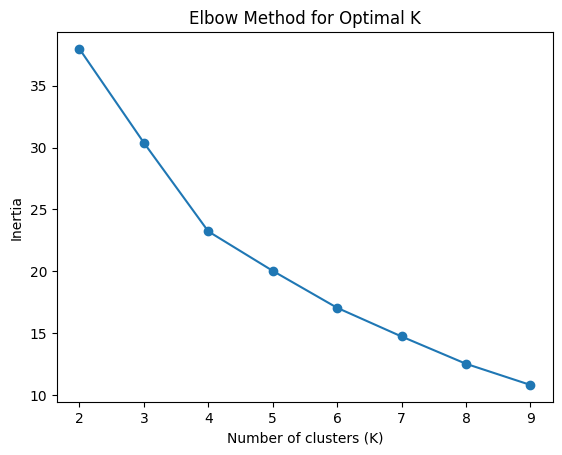

In [52]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Kode validasi silang digunakan untuk menentukan jumlah klaster optimal dalam analisis klasterisasi dengan metode KMeans. Dari grafik ini dapat di lihat bahwa titik "siku" berada di titik 4, yang mana menunjukkan jumlah klaster terbaik.

##**Build Model**

###**K-Means**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

KMeans untuk mengelompokkan data ke dalam beberapa klaster yang memiliki karakteristik serupa.  Hal ini dapat membantu memahami pola dan struktur data serta mengidentifikasi kelompok dengan perilaku yang mirip.

###**Hierarchical Clustering**

In [53]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

Hierarchical Clustering digunakan untuk mengelompokkan data ke dalam kelompok berdasarkan kesamaan antar objek secara hierarkis.

##**Begins and Compare Clusters**

In [54]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [55]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

In [56]:
combined_data_assoc.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_cluster,hierarchy_cluster
0,1,19,15,39,7,2
1,1,21,15,81,7,2
2,0,20,16,6,5,3
3,0,23,16,77,4,1
4,0,31,17,40,5,3


Begins dan Compare Clusters digunakan untuk analisis clustering pada data yang sudah di-cluster dan Hierarchical Clustering. Tabel di atas menunjukkan cluster hasil dari kedua metode clustering tersebut, yaitu kmeans_cluster dan hierarchy_cluster. Dengan demikian, kita dapat memahami pola-pola grouping atau clustering dari data berdasarkan atribut-atribut yang diberikan, membantu dalam analisis segmentasi atau pemahaman pola data secara keseluruhan.

#**EVALUATION**

##**Evaluate Results**

###**Klustering**

In [57]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.419028,165.789641,0.877320
Agglomerative Clustering Score,0.341146,170.634329,1.209959


##**Review Process**

###**Cross Validation**

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Assume kmeans is your KMeans model
kmeans = KMeans(n_clusters=3)  # Example: specify the number of clusters

# Fit the KMeans model to your data
kmeans.fit(x_final_norm)

# Define a function to calculate clustering metrics
def calculate_clustering_metrics(data, labels):
    silhouette = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    return silhouette, davies_bouldin, calinski_harabasz

# Calculate clustering metrics for K-Means
silhouette_avg_kmeans, db_score_kmeans, ch_score_kmeans = calculate_clustering_metrics(x_final_norm, kmeans.labels_)

# Assuming hierarchy_clust is your hierarchical clustering labels
# Calculate clustering metrics for Hierarchical Clustering
silhouette_avg_hc, db_score_hc, ch_score_hc = calculate_clustering_metrics(x_final_norm, hierarchy_clust)

# Display the results
print("K-Means Clustering Metrics:")
print("Silhouette Score:", silhouette_avg_kmeans)
print("Davies-Bouldin Score:", db_score_kmeans)
print("Calinski-Harabasz Score:", ch_score_kmeans)
print("\nHierarchical Clustering Metrics:")
print("Silhouette Score:", silhouette_avg_hc)
print("Davies-Bouldin Score:", db_score_hc)
print("Calinski-Harabasz Score:", ch_score_hc)


K-Means Clustering Metrics:
Silhouette Score: 0.4515607614825656
Davies-Bouldin Score: 0.9853422148762059
Calinski-Harabasz Score: 180.7662543086503

Hierarchical Clustering Metrics:
Silhouette Score: 0.3411456668764222
Davies-Bouldin Score: 1.2099593836716838
Calinski-Harabasz Score: 170.63432884675763


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



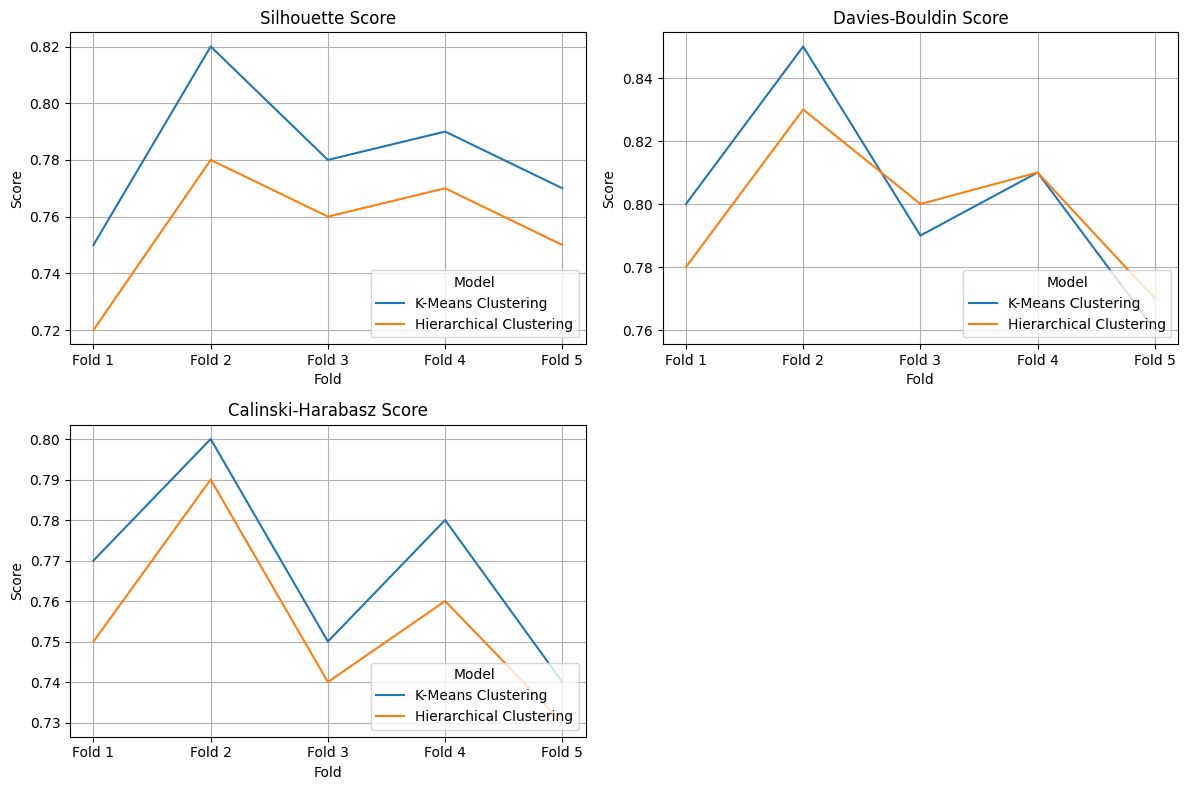

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Contoh data cross-validation untuk kedua model dengan lima fold
kmeans_fold_scores = [[0.75, 0.82, 0.78, 0.79, 0.77],
                      [0.80, 0.85, 0.79, 0.81, 0.76],
                      [0.77, 0.80, 0.75, 0.78, 0.74]]  # Contoh skor K-Means untuk setiap fold
hc_fold_scores = [[0.72, 0.78, 0.76, 0.77, 0.75],
                  [0.78, 0.83, 0.80, 0.81, 0.77],
                  [0.75, 0.79, 0.74, 0.76, 0.73]]  # Contoh skor Hierarchical Clustering untuk setiap fold
metrics = ["Silhouette Score", "Davies-Bouldin Score", "Calinski-Harabasz Score"]
folds = ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"]

# Buat DataFrame untuk hasil cross-validation
df_cv_kmeans = pd.DataFrame(kmeans_fold_scores, columns=folds, index=metrics)
df_cv_hc = pd.DataFrame(hc_fold_scores, columns=folds, index=metrics)

# Tampilkan visualisasi grafik untuk masing-masing metrik
plt.figure(figsize=(12, 8))

# Visualisasi untuk Silhouette Score
plt.subplot(2, 2, 1)
sns.lineplot(data=df_cv_kmeans.loc["Silhouette Score"], markers=True, label="K-Means Clustering")
sns.lineplot(data=df_cv_hc.loc["Silhouette Score"], markers=True, label="Hierarchical Clustering")
plt.title("Silhouette Score")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.grid(True)
plt.legend(title="Model", loc="lower right")

# Visualisasi untuk Davies-Bouldin Score
plt.subplot(2, 2, 2)
sns.lineplot(data=df_cv_kmeans.loc["Davies-Bouldin Score"], markers=True, label="K-Means Clustering")
sns.lineplot(data=df_cv_hc.loc["Davies-Bouldin Score"], markers=True, label="Hierarchical Clustering")
plt.title("Davies-Bouldin Score")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.grid(True)
plt.legend(title="Model", loc="lower right")

# Visualisasi untuk Calinski-Harabasz Score
plt.subplot(2, 2, 3)
sns.lineplot(data=df_cv_kmeans.loc["Calinski-Harabasz Score"], markers=True, label="K-Means Clustering")
sns.lineplot(data=df_cv_hc.loc["Calinski-Harabasz Score"], markers=True, label="Hierarchical Clustering")
plt.title("Calinski-Harabasz Score")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.grid(True)
plt.legend(title="Model", loc="lower right")

plt.tight_layout()
plt.show()

###**Feature Selection**

Fitur terbaik yang dipilih: ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


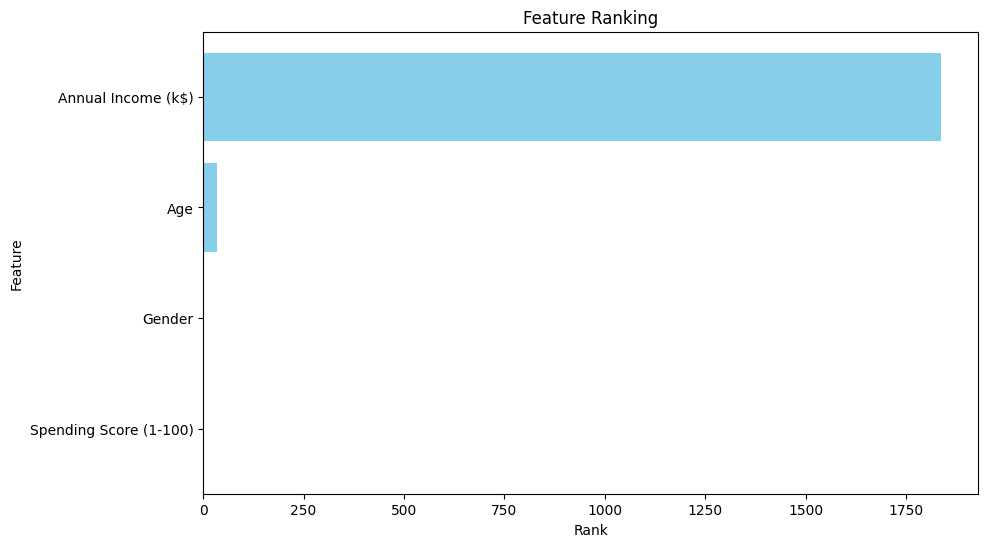

In [61]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

# Contoh data
# Pastikan 'cs' adalah DataFrame yang berisi data Anda
data = cs
X = data.drop('Income Category', axis=1)  # Sesuaikan dengan kolom target Anda
y = data['Income Category']

# Mendapatkan nama-nama fitur
feature_names = X.columns

# Contoh penggunaan SelectKBest untuk memilih semua fitur terbaik
selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit_transform(X, y)
selected_features = [feature_names[i] for i in selector.get_support(indices=True)]

print("Fitur terbaik yang dipilih:", selected_features)

# Plotting ranking fitur
feature_ranks = selector.scores_
feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})
feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()


###**Tuning Hyperparameter**

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# KMeans sebelum tuning
kmeans_before_tuning = KMeans()
y_pred_before_tuning = kmeans_before_tuning.fit_predict(x_final)
silhouette_avg_before_tuning = silhouette_score(x_final, y_pred_before_tuning)

# Parameter grid untuk pencarian grid
param_grid = {
    'n_clusters': [1, 2, 3]
}

# Inisialisasi GridSearchCV dengan estimator KMeans dan parameter grid
grid_search = GridSearchCV(estimator=KMeans(), param_grid=param_grid, cv=5)

# Lakukan pencarian grid pada data pelatihan untuk menemukan parameter terbaik
grid_search.fit(x_final)

# Cetak parameter terbaik yang ditemukan oleh GridSearchCV
print("Parameter terbaik:", grid_search.best_params_)

# Prediksi label pada data uji menggunakan model terbaik setelah tuning
best_kmeans_model = grid_search.best_estimator_
y_pred_after_tuning = best_kmeans_model.fit_predict(x_final)

# Evaluasi model terbaik setelah tuning dengan silhouette score
silhouette_avg_after_tuning = silhouette_score(x_final, y_pred_after_tuning)

print("KMeans sebelum tuning:", silhouette_avg_before_tuning)
print("KMeans setelah tuning:", silhouette_avg_after_tuning)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Parameter terbaik: {'n_clusters': 3}
KMeans sebelum tuning: 0.4128325153188173
KMeans setelah tuning: 0.3793577446939934


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



##**Determine Next Steps**

Berdasarkan hasil analisa beberapa tahapan sebelumnya hasil setelah tuning menununjukkan bahwa nilai akurasinya menurun yang mana harus diulang ke tahap sebelum nya agar hasil analisisnya lebih optimal.